In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np

In [3]:
# Load the dataset
file_path = '/content/APPLE_daily.csv'
apple_daily = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and contents
apple_daily.head()


Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.099319  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094137  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087228  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089387   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091978   73449600

In [4]:
apple_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10864 non-null  object 
 1   Open       10864 non-null  float64
 2   High       10864 non-null  float64
 3   Low        10864 non-null  float64
 4   Close      10864 non-null  float64
 5   Adj Close  10864 non-null  float64
 6   Volume     10864 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 594.2+ KB


In [5]:
# Checking for missing values in the dataset
missing_values = apple_daily.isnull().sum()

# Checking for any anomalies like extreme outliers
statistical_summary = apple_daily.describe()

missing_values, statistical_summary


(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
                Open          High           Low         Close     Adj Close  \
 count  10864.000000  10864.000000  10864.000000  10864.000000  10864.000000   
 mean      20.223833     20.444724     20.011497     20.237853     19.487996   
 std       42.241441     42.705914     41.808515     42.280773     41.892263   
 min        0.049665      0.049665      0.049107      0.049107      0.038000   
 25%        0.294643      0.301339      0.287946      0.295703      0.241669   
 50%        0.511161      0.520089      0.502545      0.511161      0.419133   
 75%       18.962144     19.108036     18.778838     18.956875     16.529413   
 max      198.020004    199.619995    197.000000    198.110001    198.110001   
 
              Volume  
 count  1.086400e+04  
 mean   3.212156e+08  
 std    3.363018e+08  
 min    0.000000e+00  
 25%    1.158800e+08  
 50%    2.087

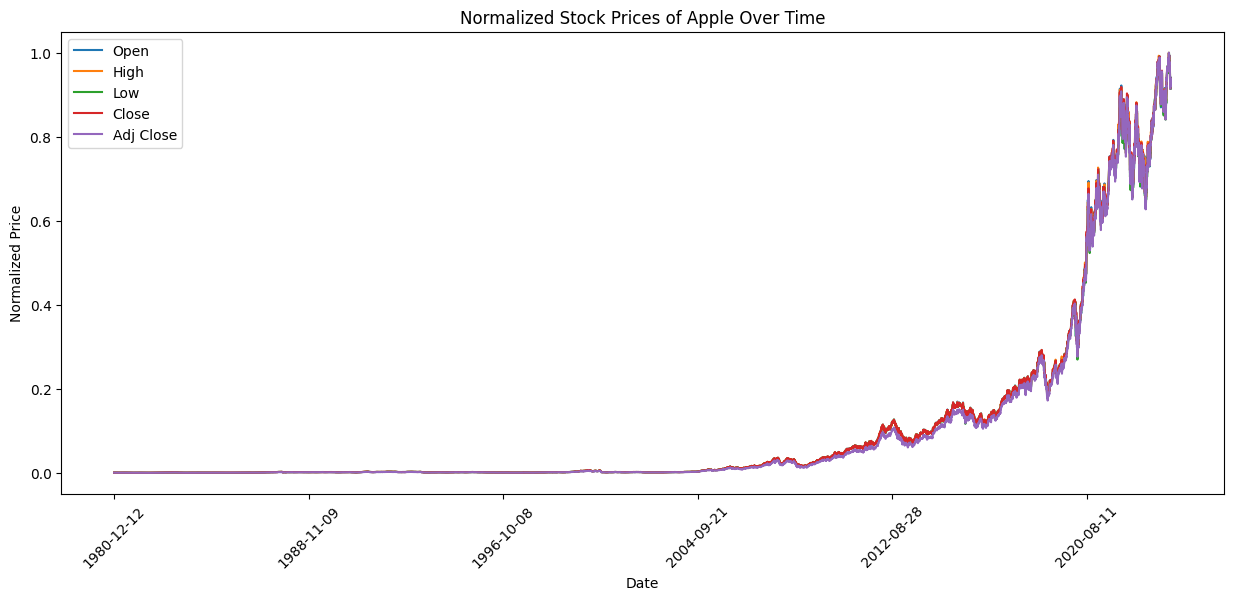

In [6]:
# Normalizing the data using Min-Max Scaler
scaler = MinMaxScaler()
apple_daily_normalized = apple_daily.copy()
apple_daily_normalized[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = scaler.fit_transform(
    apple_daily[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])

# Plotting the normalized stock prices
plt.figure(figsize=(15, 6))
plt.plot(apple_daily_normalized['Date'], apple_daily_normalized['Open'], label='Open')
plt.plot(apple_daily_normalized['Date'], apple_daily_normalized['High'], label='High')
plt.plot(apple_daily_normalized['Date'], apple_daily_normalized['Low'], label='Low')
plt.plot(apple_daily_normalized['Date'], apple_daily_normalized['Close'], label='Close')
plt.plot(apple_daily_normalized['Date'], apple_daily_normalized['Adj Close'], label='Adj Close')
plt.title('Normalized Stock Prices of Apple Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.xticks(range(0, len(apple_daily_normalized), 2000), apple_daily_normalized['Date'][::2000], rotation=45)
plt.show()


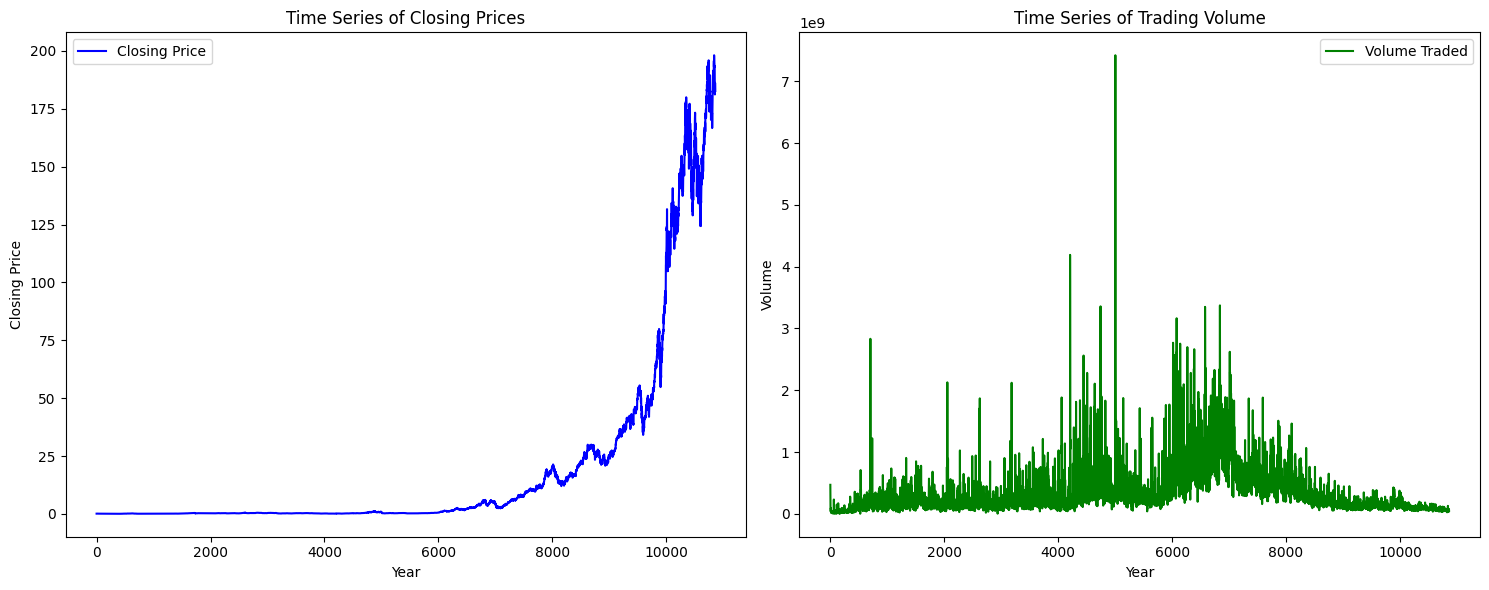

In [7]:
# Plotting the Closing Price and Volume to observe trends and seasonality

plt.figure(figsize=(15, 6))

# Plotting Closing Price
plt.subplot(1, 2, 1)
plt.plot(apple_daily['Adj Close'], label='Closing Price', color='blue')
plt.title('Time Series of Closing Prices')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend()

# Plotting Volume
plt.subplot(1, 2, 2)
plt.plot(apple_daily['Volume'], label='Volume Traded', color='green')
plt.title('Time Series of Trading Volume')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-8-546b8374aec0>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_trends = apple_daily.groupby('Month').mean()
<ipython-input-8-546b8374aec0>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_trends = apple_daily.groupby('Year').mean()


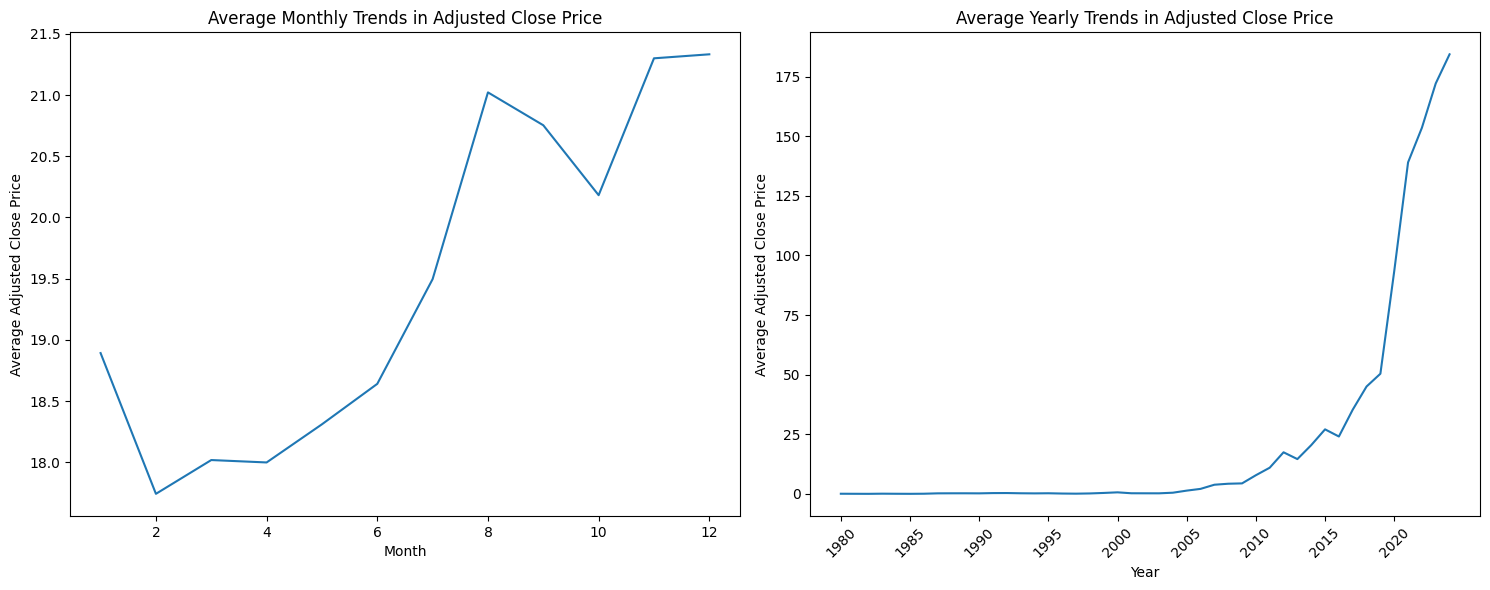

In [8]:
# Converting the 'Date' column to datetime
apple_daily['Date'] = pd.to_datetime(apple_daily['Date'])

# Extracting year and month for seasonality analysis
apple_daily['Year'] = apple_daily['Date'].dt.year
apple_daily['Month'] = apple_daily['Date'].dt.month

# Calculating average monthly trends
monthly_trends = apple_daily.groupby('Month').mean()

# Calculating average yearly trends
yearly_trends = apple_daily.groupby('Year').mean()

# Plotting the average monthly and yearly trends
plt.figure(figsize=(15, 6))

# Monthly trends
plt.subplot(1, 2, 1)
sns.lineplot(x=monthly_trends.index, y='Adj Close', data=monthly_trends)
plt.title('Average Monthly Trends in Adjusted Close Price')
plt.xlabel('Month')
plt.ylabel('Average Adjusted Close Price')

# Yearly trends
plt.subplot(1, 2, 2)
sns.lineplot(x=yearly_trends.index, y='Adj Close', data=yearly_trends)
plt.title('Average Yearly Trends in Adjusted Close Price')
plt.xlabel('Year')
plt.ylabel('Average Adjusted Close Price')
plt.xticks(np.arange(yearly_trends.index.min(), yearly_trends.index.max()+1, 5), rotation=45)

plt.tight_layout()
plt.show()


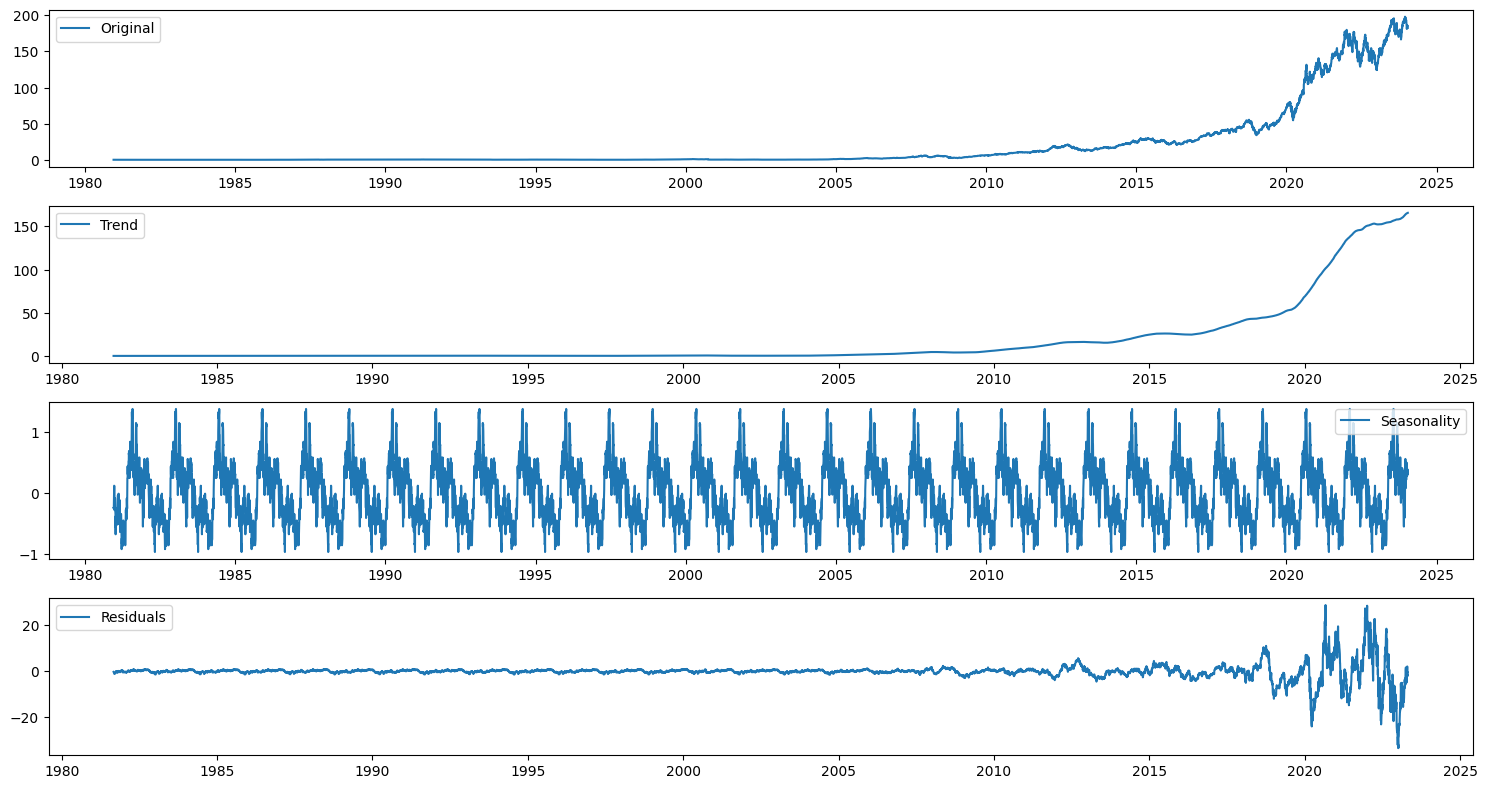

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting the date as the index
apple_daily_indexed = apple_daily.set_index('Date')

# Decomposing the time series
decomposition = seasonal_decompose(apple_daily_indexed['Adj Close'], model='additive', period=365)

# Extracting the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposition
plt.figure(figsize=(15, 8))

plt.subplot(411)
plt.plot(apple_daily_indexed['Adj Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(data):
  # Performing the Augmented Dickey-Fuller test
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [12]:
adfuller_test(apple_daily_indexed['Adj Close'])

ADF Test Statistic : 3.295465815929233
p-value : 1.0
#Lags Used : 39
Number of Observations Used : 10824
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [13]:
apple_daily_indexed['Adj Close'].diff()

Date
1980-12-12         NaN
1980-12-15   -0.005182
1980-12-16   -0.006909
1980-12-17    0.002159
1980-12-18    0.002592
                ...   
2024-01-10    1.050003
2024-01-11   -0.600006
2024-01-12    0.330002
2024-01-16   -2.289993
2024-01-17   -0.950012
Name: Adj Close, Length: 10864, dtype: float64

In [14]:
# Applying first-order differencing
data_diff = apple_daily_indexed['Adj Close'].diff().dropna()

adfuller_test(data_diff )




ADF Test Statistic : -18.29393433736814
p-value : 2.2941761347676236e-30
#Lags Used : 39
Number of Observations Used : 10823
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

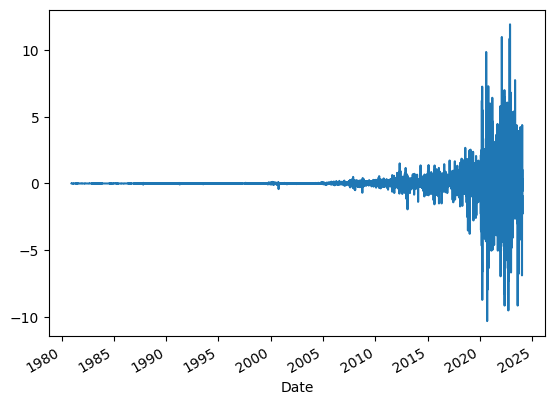

In [15]:
data_diff.plot()

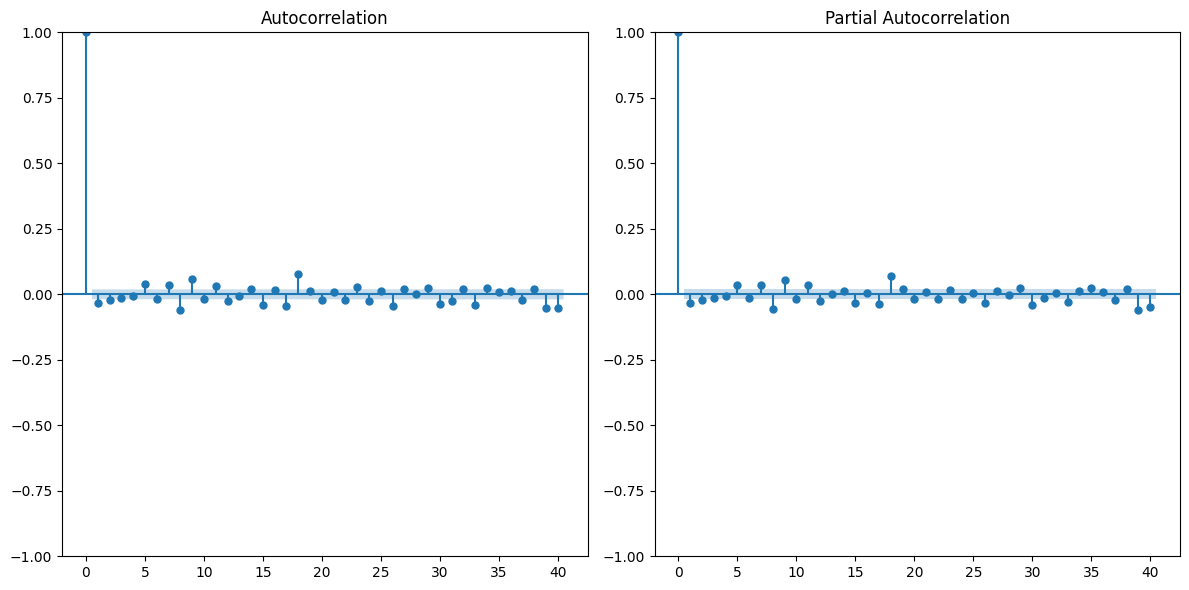

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(data_diff, ax=plt.gca(), lags=40)

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(data_diff, ax=plt.gca(), lags=40)

plt.tight_layout()
plt.show()


In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Building the ARIMA(1,1,1) model
model_arima = ARIMA(apple_daily_indexed['Adj Close'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Summary of the model
model_summary = model_arima_fit.summary()
model_summary



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                10864
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -13389.320
Date:                Tue, 06 Feb 2024   AIC                          26784.640
Time:                        07:08:59   BIC                          26806.520
Sample:                             0   HQIC                         26792.016
                              - 10864                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4166      0.057      7.305      0.000       0.305       0.528
ma.L1         -0.4527      0.056     -8.045      0.000      -0.563      -0.342
sigma2         0.6888      0.002    332.595      0.000       0.685       0.693
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            722472.08
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):           44008.46   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
print(apple_daily_indexed.dtypes)

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Year           int64
Month          int64
dtype: object


In [19]:
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

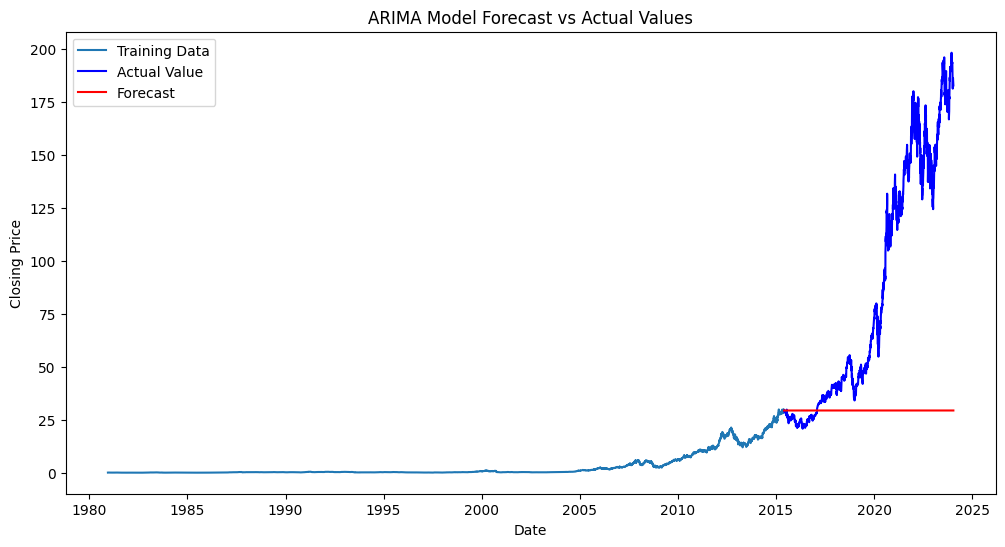

In [20]:
# Splitting the data into training and test sets (80% train, 20% test)
train_size = int(len(apple_daily_indexed['Adj Close']) * 0.8)
train_data, test_data = apple_daily_indexed[0:train_size], apple_daily_indexed[train_size:]

# Fitting the ARIMA model on the training set
model_arima_train = ARIMA(train_data['Adj Close'], order=(1, 1, 1))
model_arima_fit_train = model_arima_train.fit()

# Making predictions on the test set

# Correcting the prediction step
# We'll use the number of steps to predict rather than specific dates
n_forecast_steps = len(test_data)
start_step = len(train_data)
end_step = start_step + n_forecast_steps - 1

test_predictions = model_arima_fit_train.predict(start=start_step, end=end_step, typ='levels')

# Plotting the predictions along with the actual values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Adj Close'], label='Training Data')
plt.plot(test_data.index, test_data['Adj Close'], label='Actual Value', color='blue')
plt.plot(test_data.index, test_predictions, label='Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [21]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(test_data['Adj Close'], test_predictions))
rmse

79.6858320788553

In [22]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(apple_daily_indexed['Adj Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
model_sarimax_fit=model.fit()

# Summary of the model
model_summary = model_sarimax_fit.summary()
model_summary

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                10864
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -13409.987
Date:                            Tue, 06 Feb 2024   AIC                          26829.975
Time:                                    07:09:33   BIC                          26866.435
Sample:                                         0   HQIC                         26842.266
                                          - 10864                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4347      0.055      7.859      0.000       0.326       0.543
ma.L1         -0.4708      0.055     -8.635      0.000      -0.578      -0.364
ar.S.L12      -0.0255      0.003     -8.520      0.000      -0.031      -0.020
ma.S.L12      -0.9966      0.001  -1982.445      0.000      -0.998      -0.996
sigma2         0.6895      0.002    331.703      0.000       0.685       0.694
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):            724113.50
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):           43747.09   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        43.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

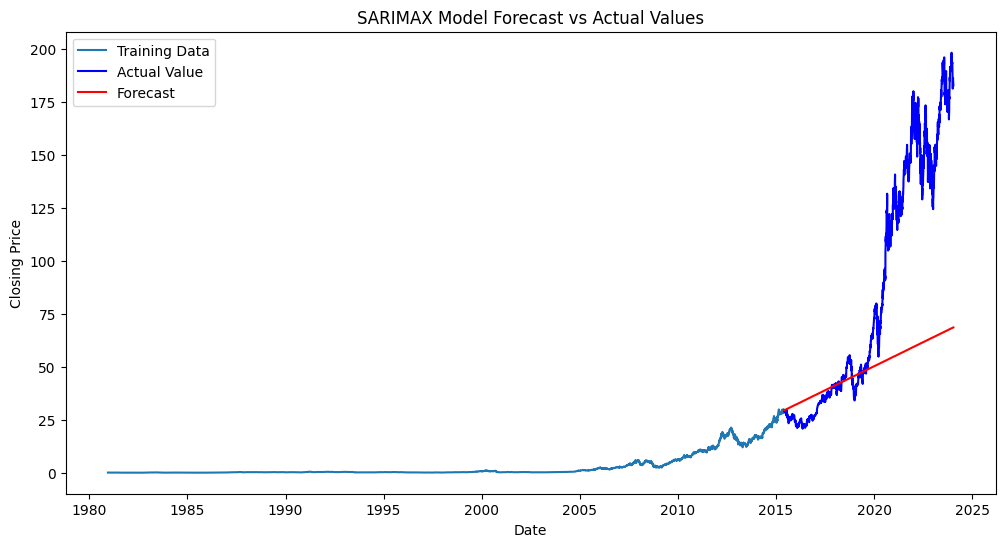

In [23]:
# Splitting the data into training and test sets (80% train, 20% test)
train_size = int(len(apple_daily_indexed['Adj Close']) * 0.8)
train_data, test_data = apple_daily_indexed[0:train_size], apple_daily_indexed[train_size:]

# Fitting the SARIMAX model on the training set
model_sarimax_train = sm.tsa.statespace.SARIMAX(train_data['Adj Close'],order=(1, 1, 1),seasonal_order=(1,1,1,2))
model_sarimax_fit_train = model_sarimax_train.fit()

# Making predictions on the test set

# Correcting the prediction step
# We'll use the number of steps to predict rather than specific dates
n_forecast_steps = len(test_data)
start_step = len(train_data)
end_step = start_step + n_forecast_steps - 1

test_predictions = model_sarimax_fit_train.predict(start=start_step, end=end_step, typ='levels')

# Plotting the predictions along with the actual values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Adj Close'], label='Training Data')
plt.plot(test_data.index, test_data['Adj Close'], label='Actual Value', color='blue')
plt.plot(test_data.index, test_predictions, label='Forecast', color='red')
plt.title('SARIMAX Model Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [24]:
# extract apple_daily_indexed data after jan 2020

apple_daily_indexed_after_2020 = apple_daily_indexed['2020-01-01':]

In [25]:
adfuller_test(apple_daily_indexed_after_2020['Adj Close'])

ADF Test Statistic : -1.6988820371440612
p-value : 0.43168857682991646
#Lags Used : 0
Number of Observations Used : 1016
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [26]:
# Applying first-order differencing
data_diff = apple_daily_indexed_after_2020['Adj Close'].diff().dropna()

adfuller_test(data_diff )


ADF Test Statistic : -33.06262824810894
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 1015
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

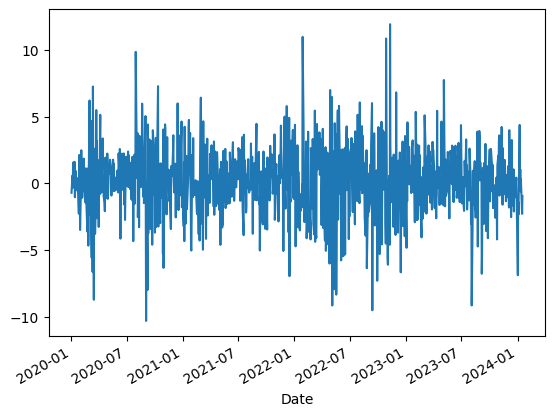

In [27]:
data_diff.plot()

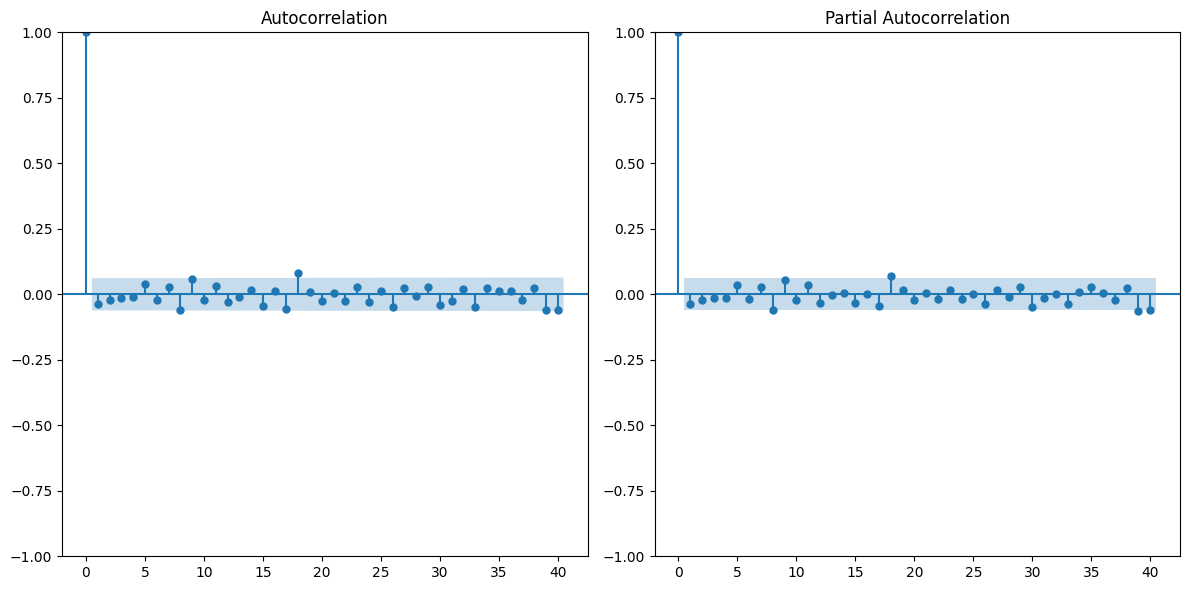

In [28]:
# Plotting ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(data_diff, ax=plt.gca(), lags=40)

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(data_diff, ax=plt.gca(), lags=40)

plt.tight_layout()
plt.show()


In [35]:
# Building the ARIMA(8,1,8) model
model_arima = ARIMA(apple_daily_indexed_after_2020['Adj Close'], order=(8, 1, 8))
model_arima_fit = model_arima.fit()

# Summary of the model
model_summary = model_arima_fit.summary()
model_summary


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1017
Model:                 ARIMA(8, 1, 8)   Log Likelihood               -2408.092
Date:                Tue, 06 Feb 2024   AIC                           4850.183
Time:                        07:16:28   BIC                           4933.885
Sample:                             0   HQIC                          4881.971
                               - 1017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0566      0.927      0.061      0.951      -1.759       1.873
ar.L2         -0.0278      0.790     -0.035      0.972      -1.576       1.520
ar.L3         -0.0219      0.611     -0.036      0.971      -1.219       1.175
ar.L4          0.6202      0.511      1.213      0.225      -0.382       1.623
ar.L5         -0.0506      0.693     -0.073      0.942      -1.408       1.307
ar.L6         -0.2565      0.633     -0.405      0.685      -1.498       0.985
ar.L7          0.2605      0.396      0.658      0.510      -0.515       1.036
ar.L8         -0.6222      0.570     -1.091      0.275      -1.740       0.496
ma.L1         -0.0824      0.929     -0.089      0.929      -1.903       1.738
ma.L2         -0.0063      0.768     -0.008      0.993      -1.511       1.499
ma.L3          0.0232      0.567      0.041      0.967      -1.088       1.134
ma.L4         -0.6237      0.478     -1.306      0.191      -1.560       0.312
ma.L5          0.0979      0.691      0.142      0.887      -1.257       1.453
ma.L6          0.2602      0.594      0.438      0.662      -0.905       1.425
ma.L7         -0.2446      0.365     -0.671      0.502      -0.959       0.470
ma.L8          0.5798      0.526      1.102      0.271      -0.452       1.611
sigma2         6.7277      0.238     28.318      0.000       6.262       7.193
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               109.11
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.10
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

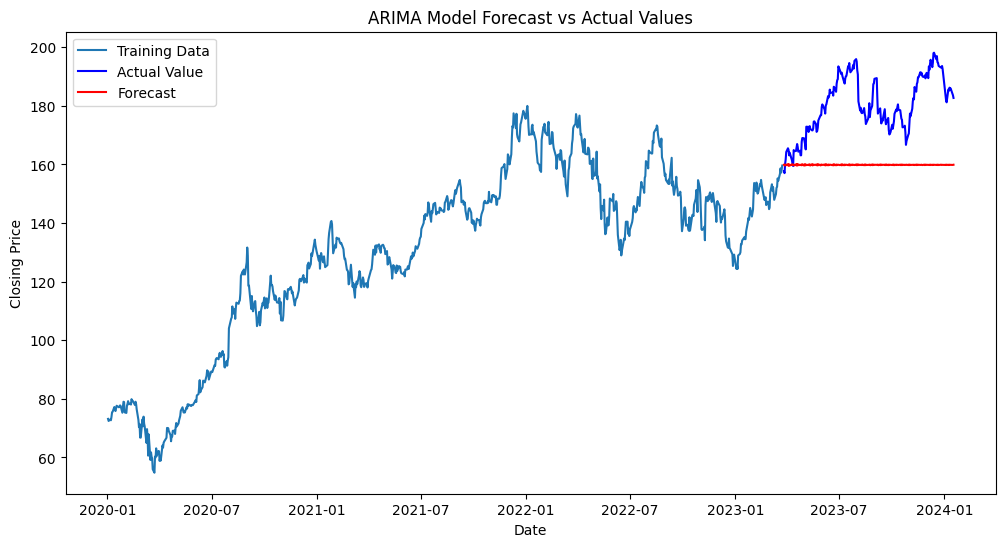

In [36]:
# Splitting the data into training and test sets (80% train, 20% test)
train_size = int(len(apple_daily_indexed_after_2020['Adj Close']) * 0.8)
train_data, test_data = apple_daily_indexed_after_2020[0:train_size], apple_daily_indexed_after_2020[train_size:]

# Fitting the ARIMA model on the training set
model_arima_train = ARIMA(train_data['Adj Close'], order=(8, 1, 8))
model_arima_fit_train = model_arima_train.fit()

# Making predictions on the test set

# Correcting the prediction step
# We'll use the number of steps to predict rather than specific dates
n_forecast_steps = len(test_data)
start_step = len(train_data)
end_step = start_step + n_forecast_steps - 1

test_predictions = model_arima_fit_train.predict(start=start_step, end=end_step, typ='levels')

# Plotting the predictions along with the actual values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Adj Close'], label='Training Data')
plt.plot(test_data.index, test_data['Adj Close'], label='Actual Value', color='blue')
plt.plot(test_data.index, test_predictions, label='Forecast', color='red')
plt.title('ARIMA Model Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [37]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(test_data['Adj Close'], test_predictions))
rmse

22.617978294613867

In [23]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(apple_daily['Adj Close'].values.reshape(-1,1))

# Preparing the data for LSTM
def prepare_lstm_data(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60  # Number of time steps to look back
X, Y = prepare_lstm_data(scaled_data, time_step)

# Splitting the data into train and test sets
train_size_lstm = int(len(X) * 0.8)
X_train, Y_train = X[:train_size_lstm], Y[:train_size_lstm]
X_test, Y_test = X[train_size_lstm:], Y[train_size_lstm:]

# Reshaping input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Building the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model_lstm.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1)


Epoch 1/50
271/271 [==============================] - 7s 8ms/step - loss: 2.2533e-05
Epoch 2/50
271/271 [==============================] - 2s 8ms/step - loss: 2.5703e-06
Epoch 3/50
271/271 [==============================] - 3s 9ms/step - loss: 2.3826e-06
Epoch 4/50
271/271 [==============================] - 2s 8ms/step - loss: 2.5268e-06
Epoch 5/50
271/271 [==============================] - 2s 8ms/step - loss: 2.4639e-06
Epoch 6/50
271/271 [==============================] - 2s 8ms/step - loss: 2.8575e-06
Epoch 7/50
271/271 [==============================] - 2s 8ms/step - loss: 2.1187e-06
Epoch 8/50
271/271 [==============================] - 2s 8ms/step - loss: 1.7252e-06
Epoch 9/50
271/271 [==============================] - 2s 9ms/step - loss: 2.4782e-06
Epoch 10/50
271/271 [==============================] - 2s 8ms/step - loss: 2.3176e-06
Epoch 11/50
271/271 [==============================] - 2s 8ms/step - loss: 1.5300e-06
Epoch 12/50
271/271 [==============================] - 2s 7ms/s

In [24]:
# Make predictions
predicted_lstm = model_lstm.predict(X_test)
predicted_lstm = scaler.inverse_transform(predicted_lstm)  # Inverse transform to original scale


68/68 [==============================] - 1s 3ms/step


In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
# Actual values need to be inverse transformed as they were scaled
actual_lstm = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate RMSE and MAE
rmse_lstm = mean_squared_error(actual_lstm, predicted_lstm, squared=False)
mae_lstm = mean_absolute_error(actual_lstm, predicted_lstm)

print(f'LSTM RMSE: {rmse_lstm}, LSTM MAE: {mae_lstm}')


LSTM RMSE: 1.9277832284861744, LSTM MAE: 1.2592863456235335


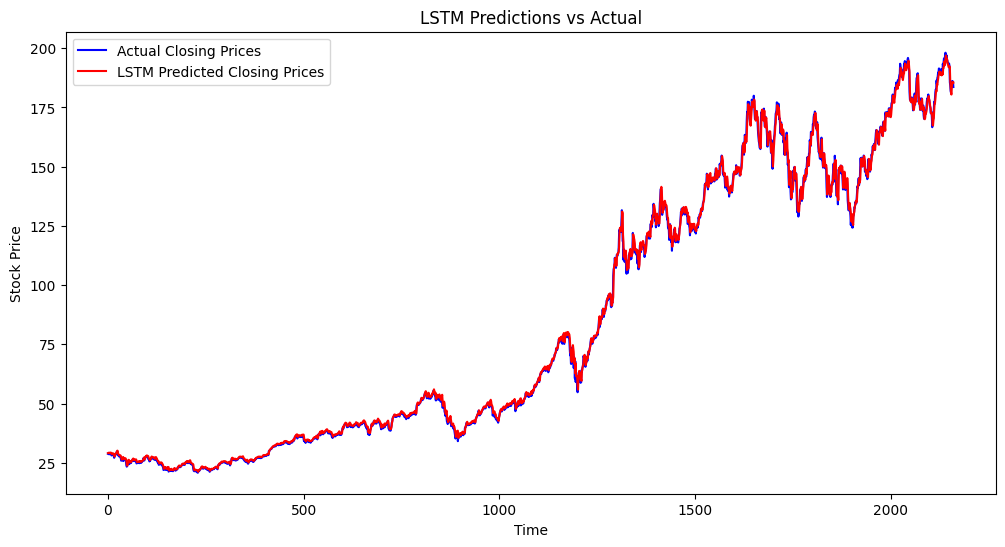

In [26]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(actual_lstm, label='Actual Closing Prices', color='blue')
plt.plot(predicted_lstm, label='LSTM Predicted Closing Prices', color='red')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [27]:
prophet_data = apple_daily.reset_index().rename(columns={'Date': 'ds', 'Adj Close': 'y'})


In [28]:
!pip install prophet

In [29]:
!pip install pystan~=2.14

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 73.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61975541 sha256=a4f699667b442e4b0adcb8f35770b42ac886de77ac1fad047532e39bbb9a0a64
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


In [30]:
import prophet

from prophet import Prophet


# Initialize the Prophet model
prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=True)

# Fit the model
prophet_model.fit(prophet_data)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bujevkh/cltvbk9o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bujevkh/sn7bf48a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81462', 'data', 'file=/tmp/tmp1bujevkh/cltvbk9o.json', 'init=/tmp/tmp1bujevkh/sn7bf48a.json', 'output', 'file=/tmp/tmp1bujevkh/prophet_modelvs4vjtz9/prophet_model-20240206061652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:16:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:17:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
# Create a future dataframe for a specified period (e.g., 365 days)
future = prophet_model.make_future_dataframe(periods=365)

# Make predictions
predictions = prophet_model.predict(future)


In [32]:
from prophet.plot import plot_plotly, plot_components_plotly

# Plot the forecast
plot_plotly(prophet_model, predictions)


In [33]:
# Plot the forecast components
plot_components_plotly(prophet_model, predictions)

In [35]:
prophet_data.shape

(10864, 10)

In [63]:
unknown_data = prophet_data.iloc[-90:]
data = prophet_data.iloc[:-90]

In [66]:
prophet_model = Prophet(daily_seasonality=True)

# Fit the model
prophet_model.fit(data)

# Create a future dataframe for a specified period (e.g., 365 days)
future = prophet_model.make_future_dataframe(periods=365)

# Make predictions
predictions = prophet_model.predict(future)



DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bujevkh/kwx9z8sm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bujevkh/fz1mynmp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22286', 'data', 'file=/tmp/tmp1bujevkh/kwx9z8sm.json', 'init=/tmp/tmp1bujevkh/fz1mynmp.json', 'output', 'file=/tmp/tmp1bujevkh/prophet_modelkk3kjrtd/prophet_model-20240206065128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:51:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:51:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [67]:
pred = predictions[predictions['ds'].isin(unknown_data['ds'])]

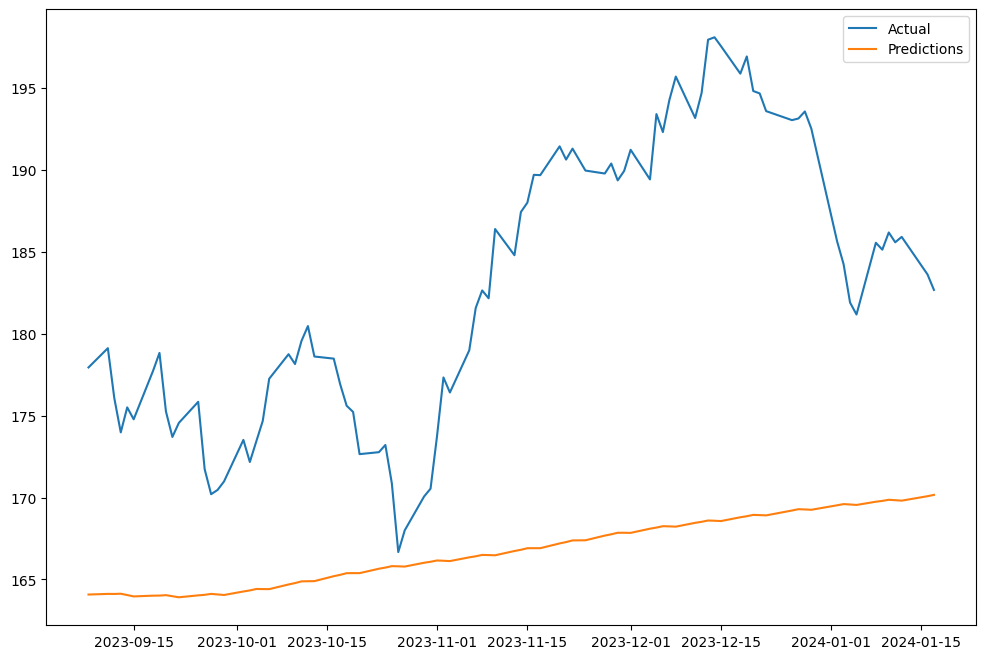

In [68]:
plt.figure(figsize = (12,8))
plt.plot(unknown_data['ds'],unknown_data['y'], label = 'Actual')
plt.plot(unknown_data['ds'],pred['yhat'], label = 'Predictions')

plt.legend()

In [46]:
forecasted_values = pred['yhat']
actual_values = unknown_data['y']

In [47]:
# Calculate RMSE and MAE
rmse_prophet = mean_squared_error(actual_values, forecasted_values, squared=False)
mae_prophet = mean_absolute_error(actual_values, forecasted_values)

print(f'Prophet RMSE: {rmse_prophet}, Prophet MAE: {mae_prophet}')


Prophet RMSE: 17.589052617253895, Prophet MAE: 16.066085387306895


Taking data after 2020

In [80]:
# prompt: extract prohet_data after Jan-2020

prophet_data_after_2020 = prophet_data[prophet_data['ds'] >= '2020-01-01']


In [81]:
prophet_data_after_2020

index         ds        Open        High         Low       Close  \
9847    9847 2020-01-02   74.059998   75.150002   73.797501   75.087502   
9848    9848 2020-01-03   74.287498   75.144997   74.125000   74.357498   
9849    9849 2020-01-06   73.447502   74.989998   73.187500   74.949997   
9850    9850 2020-01-07   74.959999   75.224998   74.370003   74.597504   
9851    9851 2020-01-08   74.290001   76.110001   74.290001   75.797501   
...      ...        ...         ...         ...         ...         ...   
10859  10859 2024-01-10  184.350006  186.399994  183.919998  186.190002   
10860  10860 2024-01-11  186.539993  187.050003  183.619995  185.589996   
10861  10861 2024-01-12  186.059998  186.740005  185.190002  185.919998   
10862  10862 2024-01-16  182.160004  184.259995  180.929993  183.630005   
10863  10863 2024-01-17  181.270004  182.929993  180.300003  182.679993   

                y     Volume  Year  Month  
9847    73.152649  135480400  2020      1  
9848    72.441460  146322800  2020      1  
9849    73.018684  118387200  2020      1  
9850    72.675270  108872000  2020      1  
9851    73.844360  132079200  2020      1  
...           ...        ...   ...    ...  
10859  186.190002   46792900  2024      1  
10860  185.589996   49128400  2024      1  
10861  185.919998   40444700  2024      1  
10862  183.630005   65603000  2024      1  
10863  182.679993   47279600  2024      1  

[1017 rows x 10 columns]

In [82]:
prophet_model = Prophet(daily_seasonality=True)

# Fit the model
prophet_model.fit(prophet_data_after_2020)

# Create a future dataframe for a specified period (e.g., 365 days)
future = prophet_model.make_future_dataframe(periods=365)

# Make predictions
predictions = prophet_model.predict(future)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bujevkh/gf62tp1p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bujevkh/31hxlftu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53506', 'data', 'file=/tmp/tmp1bujevkh/gf62tp1p.json', 'init=/tmp/tmp1bujevkh/31hxlftu.json', 'output', 'file=/tmp/tmp1bujevkh/prophet_model88pcjb2_/prophet_model-20240206065758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:57:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:57:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [83]:
from prophet.plot import plot_plotly, plot_components_plotly

# Plot the forecast
plot_plotly(prophet_model, predictions)

In [84]:
# Plot the forecast components
plot_components_plotly(prophet_model, predictions)

In [85]:
unknown_data = prophet_data_after_2020.iloc[-90:]
data = prophet_data_after_2020.iloc[:-90]

In [86]:
# Initialize the Prophet model
prophet_model = Prophet(daily_seasonality=True)

# Fit the model
prophet_model.fit(data)

# Create a future dataframe for a specified period (e.g., 365 days)
future = prophet_model.make_future_dataframe(periods=365)

# Make predictions
predictions = prophet_model.predict(future)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bujevkh/bkuwbist.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1bujevkh/7x919zde.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49551', 'data', 'file=/tmp/tmp1bujevkh/bkuwbist.json', 'init=/tmp/tmp1bujevkh/7x919zde.json', 'output', 'file=/tmp/tmp1bujevkh/prophet_model4shvyb0g/prophet_model-20240206065800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:58:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:58:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


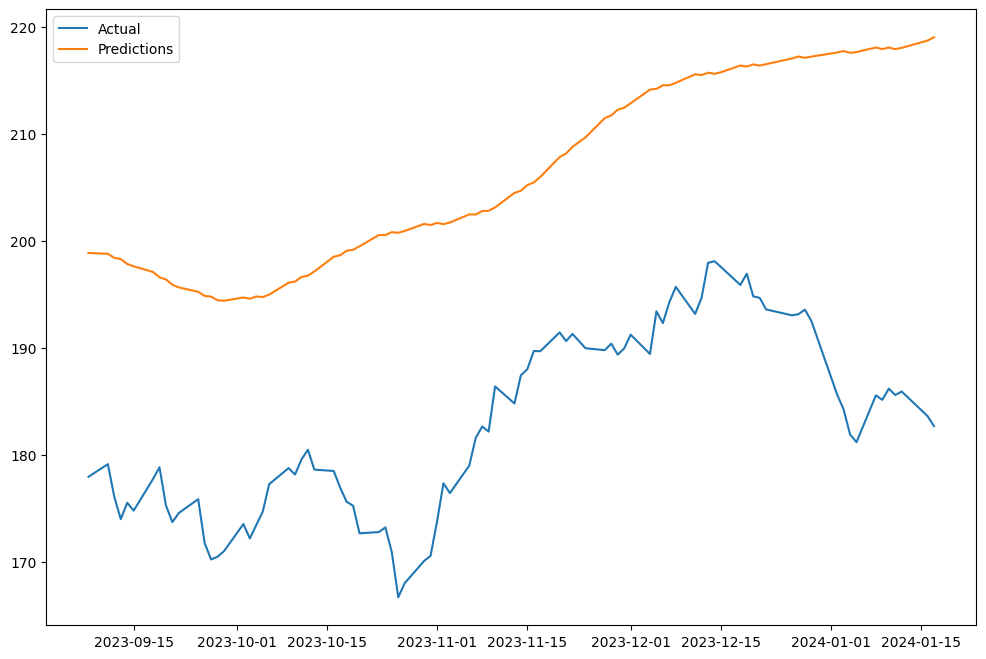

In [87]:
pred = predictions[predictions['ds'].isin(unknown_data['ds'])]

plt.figure(figsize = (12,8))
plt.plot(unknown_data['ds'],unknown_data['y'], label = 'Actual')
plt.plot(unknown_data['ds'],pred['yhat'], label = 'Predictions')

plt.legend()

In [88]:
forecasted_values = pred['yhat']
actual_values = unknown_data['y']

In [89]:
# Calculate RMSE and MAE
rmse_prophet = mean_squared_error(actual_values, forecasted_values, squared=False)
mae_prophet = mean_absolute_error(actual_values, forecasted_values)

print(f'Prophet RMSE: {rmse_prophet}, Prophet MAE: {mae_prophet}')


Prophet RMSE: 23.876279578814227, Prophet MAE: 23.268993552850304
